In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from scipy.optimize import minimize_scalar
from scipy.interpolate import CubicSpline
plt.style.use('seaborn-poster')
from scipy.integrate import quad
from scipy.optimize import root_scalar

C:\Users\Platon\AppData\Local\Temp\ipykernel_21624\1008803919.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [27]:
# define the integration limits
a = -1
b = 2

# define the integrand function
f = lambda x: norm.pdf(x)

# use the quad function to approximate the integral
result, error = quad(f, a, b)

print("The integral of the normal distribution function from", a, "to", b, "is:", result)


The integral of the normal distribution function from -1 to 2 is: 0.8185946141203638


In [28]:
x = np.linspace(-1, 2, 100)
y =  [f(xi) for xi in x]

# create a cubic spline interpolation function
cs = CubicSpline(x, y)

# define the integration limits
a = -1
b = 2

# define the integrand function
integrand = lambda x: cs(x)

# use the quad function to approximate the integral
result, error = quad(integrand, a, b)

# normalize the envelope function
envelope_function = lambda x: cs(x) / result

# define the integration limits for normalization
a_norm = -1
b_norm = 2

# define the integrand function for normalization
g = lambda x: envelope_function(x)

# use the quad function to approximate the integral for normalization
result_norm, error_norm = quad(g, a_norm, b_norm)

# print the result
print("The integral of the normalized envelope function from", a_norm, "to", b_norm, "is:", result_norm)


The integral of the normalized envelope function from -1 to 2 is: 1.0


In [29]:
h = lambda x: f(x)/g(x)
res = minimize_scalar(lambda x: -(h(x)), bounds=(-1, 2), method='bounded')
supremum = 1/-res.fun
print(supremum)

1.2216058808085943


In [30]:
# define the indefinite integral function
F = lambda x: quad(g, -1, x)[0]

# define the function to find the root of for F_inv(x)
def G(y):
    # find the largest range that contains a root
    for i in range(len(x)-1):
        a, b = x[i], x[i+1]
        if (F(a) - y) * (F(b) - y) <= 0:
            break
    
    # find the root within that range
    return root_scalar(lambda x: F(x) - y, bracket=[a, b], method='bisect').root


# find the inverse function F_inv(x)
F_inv = lambda y: root_scalar(lambda x: G(x) - y, bracket=[-1, 2], method='bisect').root


In [31]:
samples = np.zeros(shape=(10000, ))
iteration = 0
while iteration < 10000:
    u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    y1 = F_inv(u1)

    if u2 <= h(y1)/supremum:
            samples[iteration] = y1
            iteration += 1
    else:
        continue

ValueError: f(a) and f(b) must have different signs

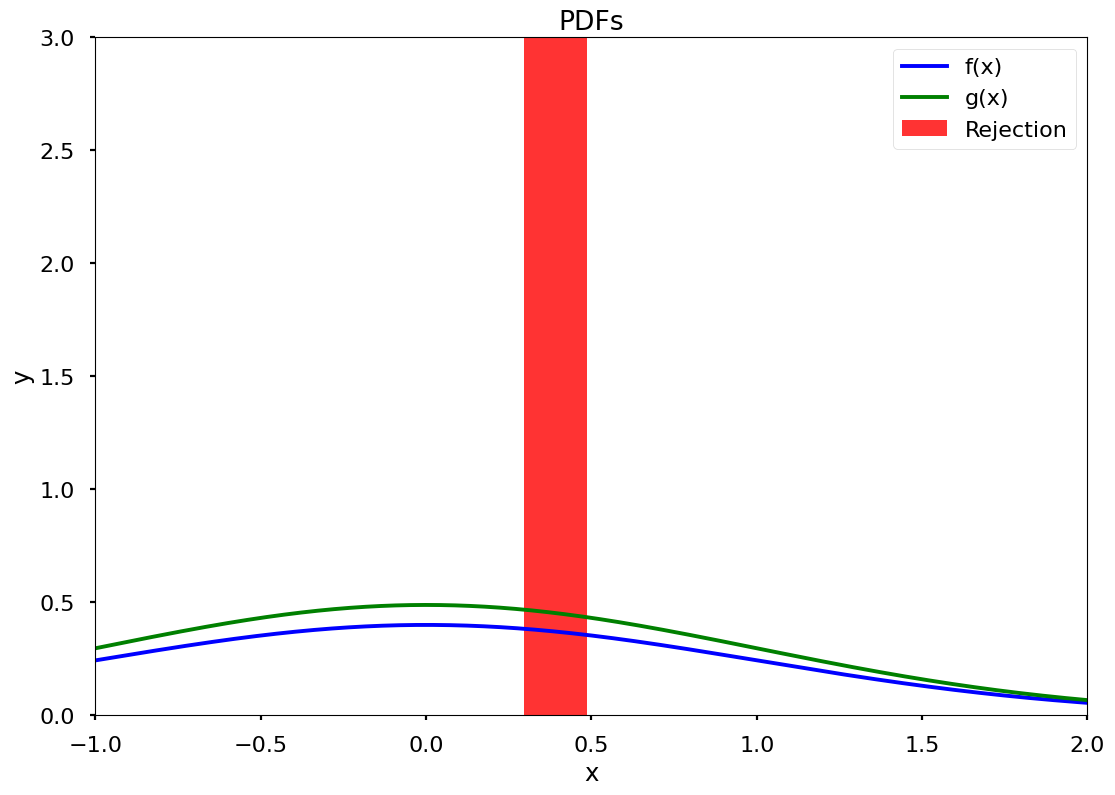

In [ ]:
# Generate x and y values for f(x)
z = np.linspace(-1, 2, 1000)
f_y = [f(xi) for xi in z]
g_y = [g(xi) for xi in z]

# Plot f
plt.plot(z, f_y, label='f(x)', color = 'b')

# Plot g
plt.plot(z, g_y, label='g(x)', color = 'g')

# Plot the histogram
plt.hist(samples, bins=30, density=True, color = 'r', alpha=0.8, label='Rejection')

plt.title('PDFs')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,2)
plt.ylim(0,3)
plt.legend()
plt.show()